<h1>Analisis Exploratorio de Datos (EDA).</h1>

<h2>1. Listado de Variables y Selección.</h2>

El dataset que utilizaremos esta constituido con un total de 3000 filas x 16 columnas, que muestran por cada paciente(de género: F o M, y Edad) un conjunto de síntomas y actividades que poseen, toda esta informacion se encuentra en el archivo dataset "Lung_Cancer.csv"

<h3>Variables de Entrada.</h3>

Consideraremos para este Trabajo: 2 = **SI**, 1 = **NO**.

- **Gender:** Género del paciente, Actualmente (F: Femenino, M: Masculino), **lo vamos a reconvertir** (1: Femenino, 2: Masculino).
- **Age:** Edad del paciente.
- **Smoking:** Si el paciente es un fumador habitual.
- **Yellow_Fingers:** Si el paciente posee el síntoma de *Dedos Amarillos.*
- **Anxiety:** Si el paciente posee el síntoma de *Ansiedad.*
- **Peer_Pressure:** Si el paciente sufre de *Presión* por fumar o tomar alcohol.
- **Chronic_Disease:** Si el paciente sufre de algun tipo de enfermedad crónica.
- **Fatigue:** Si el paciente experimenta *Fatiga.*
- **Allergy:** Si el paciente sufre de algún tipo de *Alergia.*
- **Wheezing:** Si se oye algún tipo de sonido agudo en la respiración del paciente.
- **Alcohol_Consuming:** Si el paciente es alcoholico.
- **Coughing:** Si el paciente presenta *Tos.*
- **Shortness_Of_Breath:** Si el paciente posee dificultad para respirar.
- **Swallowing_Dificulty:** Si el paciente posee dificultad para tragar.
- **Chest_Pain:** Si el paciente padece de dolor en el pecho.

<h3>Variable de Salida.</h3>

Nuestra variable de salida será **LUNG_CANCER:** El diagnóstico final sobre la presencia de Cáncer de Pulmón, Actualmente (YES, NO), **lo vamos a reconvertir** (1: SI, 2: NO). Con esta variable vamos a predecir si un paciente posee Cáncer de Pulmón o no. 

<h3>Variables que no se Utilizarán.</h3>

(VER) Si hay alguna que no podamos utilizar, por el momento las utilizaremos todas.

In [14]:
# Importamos las dependencias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import sklearn_pandas
from matplotlib import gridspec
import pytz
import random
import os

In [15]:
# Importamos el dataset.
dataset = pd.read_csv('Lung_Cancer.csv',encoding='UTF-8')

dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
629,M,37,2,2,2,1,2,1,2,2,1,1,1,2,2,NO
2481,M,60,2,1,1,1,1,1,2,2,1,2,2,1,2,YES
1275,F,32,2,2,1,1,2,1,1,2,2,2,2,2,1,YES
1255,F,34,1,1,1,1,2,1,1,1,2,2,1,1,1,NO
974,M,76,1,1,1,2,1,1,1,2,1,2,1,2,2,NO


In [16]:
# Tipo de datos y dimensiones del Dataset.
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [17]:
# Filas x Columnas.
dataset.shape

(3000, 16)

<h2>2. Análisis detallado de un conjunto de variables.</h2>

<h3>a. Comportamiento de la variable de Salida.</h3>

In [33]:
# Reconvertimos el género y el diagnóstico de Cáncer de Pulmón a valores enteros: (1: Masculino, 0: Femenino), (1: Si, 2: No).
data = dataset.copy()
data['GENDER'] = data.GENDER.map({'M' : 1, 'F' : 0})
data.LUNG_CANCER = data.LUNG_CANCER.map({'YES': 1, 'NO': 0})
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1731,0,36,2,1,1,2,2,2,2,2,1,2,2,1,1,1
2412,1,42,1,2,1,1,1,1,2,2,2,2,2,1,2,1
1692,1,74,2,2,1,1,2,2,1,2,2,1,2,2,1,1
1138,1,59,1,1,1,1,2,2,1,2,2,2,2,1,1,1
775,1,75,1,2,1,1,2,2,2,1,2,2,2,1,2,1


<Axes: ylabel='count'>

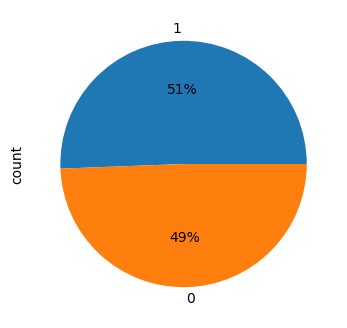

In [34]:
# Graficamos la distribución de la variable de salida.
data.LUNG_CANCER.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4))

Podemos observar que el dataset se encuentra balanceado en cuanto a la cantidad de pacientes que poseen cancer de pulmón. Vemos que el 51% de los pacientes cuentan con un diagnóstico positivo de cáncer de pulmon, mientras que el otro 49% no, ésta es una relación muy pareja, 50/50.

<h2>b. Análisis individual de cada variable de entrada.</h2>

**Variable: Gender.** 

Nuestro conjunto de datos esta compuesto a grandes rasgos por un 50% de Hombres (1514) y un 50% de Mujeres (1486).

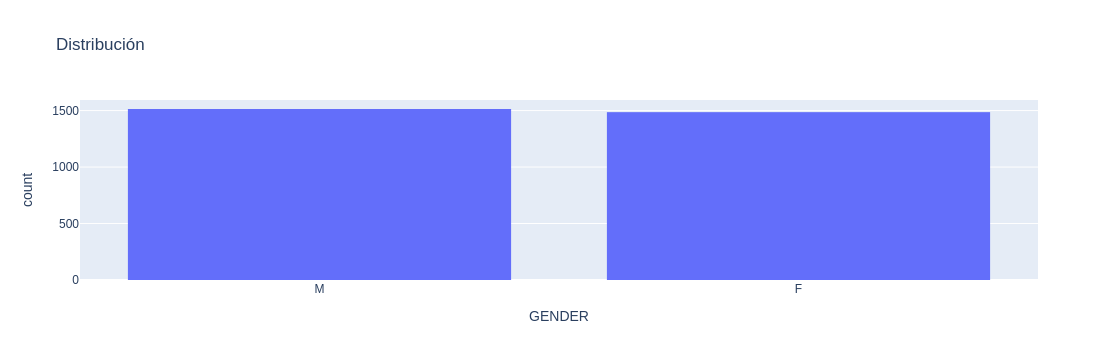

In [36]:
# Graficamos la distribución de la variable de entrada "Gender".
px.histogram(dataset, x='GENDER', title = 'Distribución')

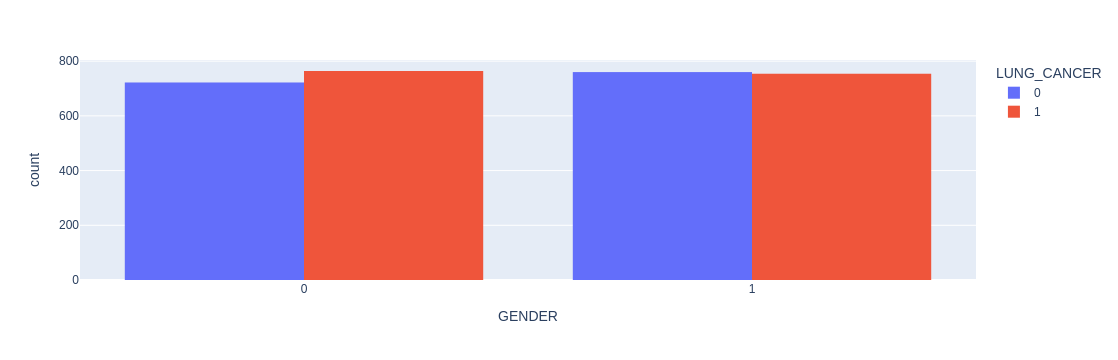

In [38]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# 1: Masculino, 2: Femenino.
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='GENDER', color='LUNG_CANCER', barmode='group')

Por lo que podemos observar, el género del paciente no es una variable que tiene mucho peso en nuestro dataset, es decir, que una persona sea mujer u hombre, no es es tan imprescindible para nuestro análisis, vemos que los resultados son muy parejos, de la cantidad de hombres, la mitad poseen un diagnóstico positivo y la mitad no, mismo caso en mujeres.

**Variable: Age.**

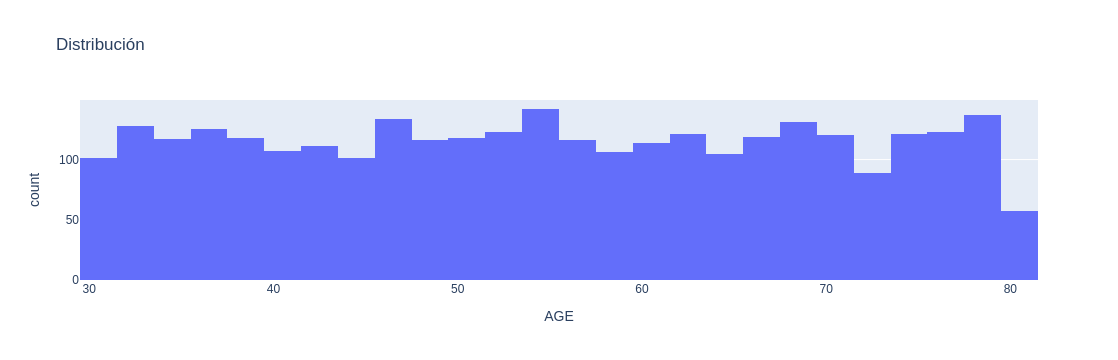

In [25]:
# Graficamos la distribución de la variable de entrada "Age".
px.histogram(dataset, x='AGE', title = 'Distribución')

Por lo que podemos ver a partir del histograma anterior, tenemos un promedio de 100 pacientes por cada edad, excepto los pacientes mayores a 80 años, con los cuales contamos con 57. Éste dato es sumamente importante ya que si contaramos con un dataset en donde tendríamos un cuarto de pacientes jovenes o mayores podríamos tener problemas de "Overfitting", es decir podría dejar influenciarse por esa cantidad y predecir erróneamente.

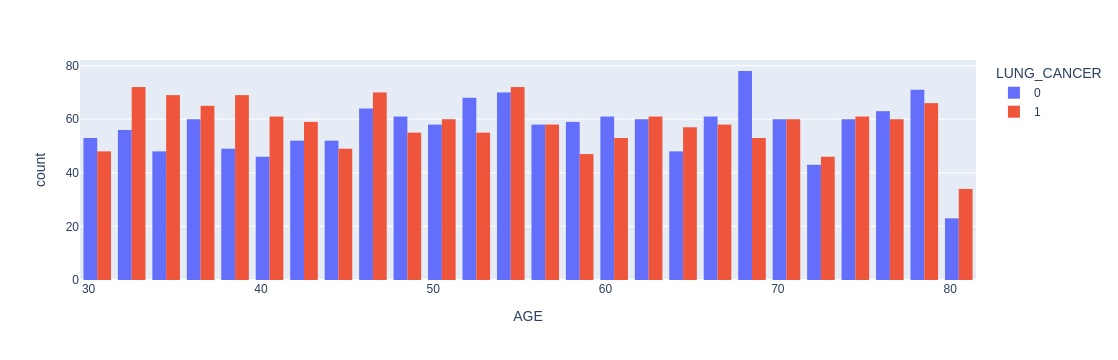

In [40]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='AGE', color='LUNG_CANCER', barmode='group')

Podemos observar que los pacientes que tienen entre 32 y 46 años y entre 70 y 81 años en su mayoría poseen un diagnóstico de cáncer de pulmon positivo, mientras que el resto en promedio su porcentaje es negativo, igualmente con respecto a la edad podemos ver que nuestro dataset se encuentra bastante balanceado, tenemos pacientes de todas las edades que presentan un diagnóstico positivo y negativo.

**Variable: Smoking.**

<Axes: title={'center': 'Distribución'}, ylabel='count'>

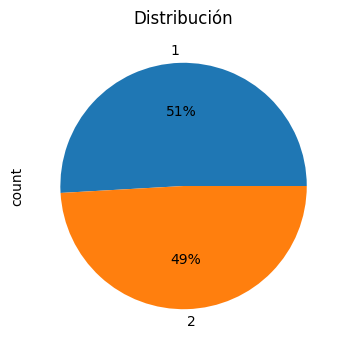

In [43]:
# Graficamos la distribución de la variable de entrada
# Vemos que el 51% NO son fumadores, mientras que el 49% si lo son.
data.SMOKING.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4), title = 'Distribución')

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

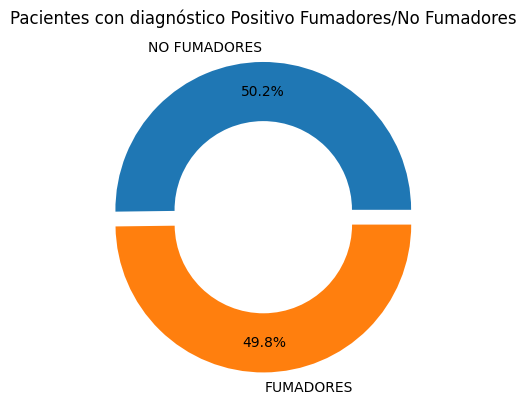

In [55]:
#¿Que Porcentaje de pacientes FUMADORES poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['SMOKING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 1:
        labels.append('NO FUMADORES')
    else:
        labels.append('FUMADORES')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 50.2% de los pacientes son NO fumadores, mientras que el 49.8% SI lo son.

In [6]:
# Por lo que podemos observar el Dataset no tiene valores nulos.
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
#Ver si hay duplicados
#
#
#